In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.DataFrame({
    'mesin' : [1000,2000,3000,4000,5000],
    'harga' : [10,25,30,65,80]
})
df

,mesin,harga
0,1000,10
1,2000,25
2,3000,30
3,4000,65
4,5000,80


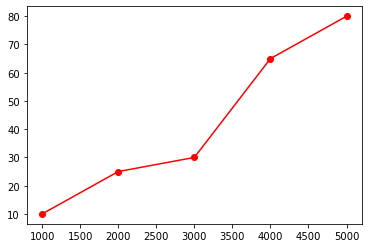

In [4]:
plt.plot(df['mesin'],df['harga'], 'r-o')
plt.show()

In [5]:
df.corr()

,mesin,harga
mesin,1.000000,0.971909
harga,0.971909,1.000000


In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
model = LinearRegression()

In [8]:
model.fit(df[['mesin']],df['harga'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
display(model.coef_[0])
display(model.intercept_)

0.018

-11.999999999999993

In [10]:
df['y"']=model.predict(df[['mesin']])

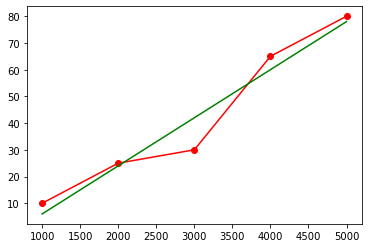

In [11]:
plt.plot(df['mesin'],df['harga'],'r-o')
plt.plot(df['mesin'],df['y"'],'g-')
plt.show()

In [12]:
# mesin = 0 cc maka harga = intercept
print(model.predict([[0]])[0])

# mesin = 1 cc maka harga = ?
print(model.predict([[1]])[0])

#selisih harga mesin 1 cc & 0 cc
print(model.predict([[1]])[0]-model.predict([[0]])[0])
# setiap naik 1cc, maka harga akan naik 0.018 juta

-11.999999999999993
-11.981999999999992
0.018000000000000682


In [13]:
# hitung residual/error/galat/ralat/toleransi
# |harga prediksi - harga aktual|
df['|y-y"|'] = np.abs(df['y"']-df['harga'])
df

,mesin,harga,"y""","|y-y""|"
0,1000,10,6.0,4.0
1,2000,25,24.0,1.0
2,3000,30,42.0,12.0
3,4000,65,60.0,5.0
4,5000,80,78.0,2.0


### Evalution matrix

<hr>

#### 1. Max Error :

- Residual/error/selisih y aktual & y prediksi tertinggi 
- Makin tinggi max error maka model makin buruk

$$ \displaystyle \textrm{Max Error} = \textrm{Max} (| y - \hat{y}|)$$


In [14]:
maxErr = df['|y-y"|'].max()
maxErr

12.0

<hr>

#### 2. Mean Absolute Error (MAE)

- Rata-rata nilai error

$$\displaystyle \textrm{MAE} = \frac {1}{n} \sum (| y - \hat{y}|)  $$

In [15]:
n = df['mesin'].count()
MAE = round(df['|y-y"|'].sum()) / n
MAE

4.8

<hr>

#### Sum Squared Error (SSE)

$$\displaystyle \textrm{SSE} =  \sum|y - \hat{y}|^2  $$

In [16]:
df['|y-y"|^2'] = df['|y-y"|'] ** 2

In [17]:
sse = round(df['|y-y"|^2'].sum())
sse

190.0

<hr>

#### 3. Mean Squared Error (MSE)

- __MSE__ : rata-rata SSE = SSE/jumlah data

$$\displaystyle \textrm{MSE} =\frac {1}{n}  \sum|y - \hat{y}|^2  $$

In [18]:
mse = sse/n
mse

38.0

<hr>

#### 4. Root of MSE (RMSE)

- Biasanya digunakan sebagai nilai ralat untuk setiap hasil prediksi

$$\displaystyle \textrm{RMSE} = \sqrt { \frac {1}{n}  \sum|y - \hat{y}|^2}  $$

In [19]:
rmse = mse ** (0.5)
rmse

6.164414002968976

<hr>

#### 5. Median Absoulte Error (MedAE)

$$\displaystyle \textrm{MedAE} = \textrm{Median} (|y_1 - \hat{y_1}|,...,|y_n - \hat{y_n}|) $$

In [20]:
df = df.sort_values('|y-y"|')
medae = np.median(df['|y-y"|'])
medae

3.999999999999993

<hr>

#### 6. Mean Squared Logarithmic Error (MSLE)

- $\ln{x} = ^e\log{x}$
$$ \displaystyle \textrm{MSLE} = \frac {1}{n} \sum ( \ln{(1 +y_i)} - \ln{(1 + \hat{y_i})}) ^2 $$

In [21]:
df['ln(1+y)']  = np.log(df['harga'] + 1)
df['ln(1+y")'] = np.log(df['y"'] + 1)
df['sle'] = (df['ln(1+y)'] - df['ln(1+y")']) ** 2
df

,mesin,harga,"y""","|y-y""|","|y-y""|^2",ln(1+y),"ln(1+y"")",sle
1,2000,25,24.0,1.0,1.0,3.258097,3.218876,0.001538
4,5000,80,78.0,2.0,4.0,4.394449,4.369448,0.000625
0,1000,10,6.0,4.0,16.0,2.397895,1.945910,0.204291
3,4000,65,60.0,5.0,25.0,4.189655,4.110874,0.006206
2,3000,30,42.0,12.0,144.0,3.433987,3.761200,0.107068


In [22]:
msle = df['sle'].sum() / n
msle

0.06394571950280772

<hr>

#### 7. Root of Mean Squared Logarithmic Error (RMSLE)

$$ \displaystyle \textrm{RMSLE} = \sqrt { \frac {1}{n} \sum ( \ln{(1 +y_i)} - \ln{(1 + \hat{y_i})}) ^2 } $$

In [23]:
rmsle = np.sqrt(msle)
rmsle

0.2528749088043488

<hr>

#### 8. Mean Absolute Percentage Error (MAPE)

Absolute Percentage Error $ \displaystyle = | \frac {y - \hat{y}}{y} | $

$$ \displaystyle \textrm{MAPE} \frac {1}{n} \sum | \frac {y - \hat{y}}{y} | $$

In [24]:
df['ape'] = np.abs((df['harga'] - df['y"']) / df['harga'])

In [25]:
mape = df['ape'].sum()/n
mape

0.18838461538461518

<hr>

#### 9. Mean Squared Percentage Error

$$ \displaystyle \textrm{MSPE} = \frac {1}{n} \sum ( \frac {y - \hat{y}}{y} ) ^ 2 $$

In [26]:
df['ape^2'] = df['ape'] ** 2

In [27]:
mspe = df['ape^2'].sum()/n
mspe

0.06562843195266262

<hr>

#### 10. $R^2$ Score

- $R^2$ score (coeeficient of determination)

$$ \displaystyle R^2 \textrm{score} = 1 - \frac {\sum (y-\hat{y}^2)} {\sum(y-\bar{y})^2} $$

dimana $\hat{y}$ = y prediksi dan $\bar{y}$ = y rata-rata

In [28]:
df['(y-yrata)^2'] = (df['harga'] - df['harga'].mean()) ** 2

In [29]:
r2 = 1- (df['|y-y"|^2'].sum() / df['(y-yrata)^2'].sum())
r2

0.9446064139941691

<hr>

### 11 Evaluation Metrics using sklearn

In [30]:
from sklearn.metrics import(
    max_error,
    mean_absolute_error,
    mean_squared_error,
    mean_squared_log_error,
    median_absolute_error,
    r2_score
)

In [44]:
print('Max Error : {}'.format(max_error(df['harga'],df['y"'])))
print("MAE = {}".format(mean_absolute_error(df['harga'],df['y"'])))
print("MSE = {}".format(mean_squared_error(df['harga'],df['y"'])))
print("RMSE = {}".format(np.sqrt(mean_squared_error(df['harga'],df['y"']))))
print("MSLE = {}".format(mean_squared_log_error(df['harga'],df['y"'])))
print("RMSLE = {}".format(np.sqrt(mean_squared_log_error(df['harga'],df['y"']))))
print("Median Absolute Error = {}".format(median_absolute_error(df['harga'],df['y"'])))
print("R2 = {}".format(r2_score(df['harga'],df['y"'])))

Max Error : 12.0
MAE = 4.799999999999995
MSE = 37.99999999999997
RMSE = 6.164414002968974
MSLE = 0.06394571950280772
RMSLE = 0.2528749088043488
Median Absolute Error = 3.999999999999993
R2 = 0.9446064139941691
